In [33]:
import pandas as pd
import numpy as np
import pytz
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import datetime, timedelta
import time

In [34]:
df = pd.read_csv('C://Users//dell//OneDrive//Desktop//Data Fiverr//data.csv')

In [35]:
df.head()

,ORDER_ID,ORDER_TIME_PST,CITY_DISTRICT_ID,RPTG_AMT,CURRENCY_CD,ORDER_QTY,SHIP_TO_CITY_CD_EN,SHIP_TO_DISTRICT_NAME_EN,ORDER_TIME_CST
0,G0000001198,50127,1,1680.53,RMB,1.0,Xiamen,Jimei District,3:55:27 PM
1,G0000001469,50127,2,8760.18,RMB,1.0,Xuancheng,Xuanzhou District,3:55:27 PM
2,G0000000001,50128,3,7875.22,RMB,1.0,Shenyang,Heping District,3:55:28 PM
3,G0000001999,50132,4,10353.10,RMB,1.0,Hefei,Yaohai District,3:55:32 PM
4,G0000000002,50132,5,11946.02,RMB,1.0,Yangzhou,Guangling District,3:55:32 PM


In [36]:
#NA Values and Blanks
print(df.isnull().sum())

ORDER_ID                     0
ORDER_TIME_PST               0
CITY_DISTRICT_ID             0
RPTG_AMT                     0
CURRENCY_CD                  0
ORDER_QTY                   38
SHIP_TO_CITY_CD_EN          37
SHIP_TO_DISTRICT_NAME_EN    37
ORDER_TIME_CST               0
dtype: int64


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159750 entries, 0 to 159749
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ORDER_ID                  159750 non-null  object 
 1   ORDER_TIME_PST            159750 non-null  int64  
 2   CITY_DISTRICT_ID          159750 non-null  int64  
 3   RPTG_AMT                  159750 non-null  float64
 4   CURRENCY_CD               159750 non-null  object 
 5   ORDER_QTY                 159712 non-null  float64
 6   SHIP_TO_CITY_CD_EN        159713 non-null  object 
 7   SHIP_TO_DISTRICT_NAME_EN  159713 non-null  object 
 8   ORDER_TIME_CST            159750 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 11.0+ MB
None


In [38]:
#Drop N/A and Blanks in ORDER_QTY Column
df = df.dropna(subset=['ORDER_QTY'])

In [39]:
print(df.isnull().sum())

ORDER_ID                     0
ORDER_TIME_PST               0
CITY_DISTRICT_ID             0
RPTG_AMT                     0
CURRENCY_CD                  0
ORDER_QTY                    0
SHIP_TO_CITY_CD_EN          37
SHIP_TO_DISTRICT_NAME_EN    37
ORDER_TIME_CST               0
dtype: int64


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159712 entries, 0 to 159749
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ORDER_ID                  159712 non-null  object 
 1   ORDER_TIME_PST            159712 non-null  int64  
 2   CITY_DISTRICT_ID          159712 non-null  int64  
 3   RPTG_AMT                  159712 non-null  float64
 4   CURRENCY_CD               159712 non-null  object 
 5   ORDER_QTY                 159712 non-null  float64
 6   SHIP_TO_CITY_CD_EN        159675 non-null  object 
 7   SHIP_TO_DISTRICT_NAME_EN  159675 non-null  object 
 8   ORDER_TIME_CST            159712 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.2+ MB
None


In [41]:
# Replace 74 #N/A Cities with Unknown for ID: 999999
df['SHIP_TO_CITY_CD_EN'] = df['SHIP_TO_CITY_CD_EN'].replace('#N/A', 'Unknown')

In [42]:
# Replace 74 #N/A Districts with Unknown for ID: 999999
#df['SHIP_TO_DISTRICT_NAME_EN'] = df['SHIP_TO_DISTRICT_NAME_EN'].replace('#N/A', 'Unknown')

In [43]:
#PST Timestamp Conversion
#df['ORDER_TIME_PST'] = pd.to_numeric(df['ORDER_TIME_PST'], errors='coerce')

In [44]:
#time_offset = timedelta(hours=2)

In [45]:
#df['ORDER_TIME_PST_days'] = df['ORDER_TIME_PST'] / (60 * 60 * 24)

In [46]:
#df['ORDER_TIME_RESULT'] = pd.to_datetime(df['ORDER_TIME_PST_days'], unit='D') + time_offset
#df['ORDER_TIME_RESULT'] = df['ORDER_TIME_RESULT'].dt.strftime('%I:%M:%S %p')

In [47]:
# Convert ORDER_TIME_PST column to integers, handling errors gracefully
df['ORDER_TIME_PST'] = pd.to_numeric(df['ORDER_TIME_PST'], errors='coerce', downcast='integer')

# Drop rows where conversion failed (NaN values)
df.dropna(subset=['ORDER_TIME_PST'], inplace=True)

# Convert Unix timestamp to HH:MM:SS format
df['ORDER_TIME_PST'] = df['ORDER_TIME_PST'].astype(int)
df['ORDER_TIME_PST'] = df['ORDER_TIME_PST'].apply(lambda x: time.strftime("%H:%M:%S", time.gmtime(x)))

In [48]:
df['ORDER_TIME_PST'] = df['ORDER_TIME_PST'] + timedelta(days=1, hours=-6)

In [49]:
# Convert Duration column to timedelta object
df['ORDER_TIME_PST'] = pd.to_timedelta(df['ORDER_TIME_PST'])

# Extract time part (HH:MM:SS)
df['ORDER_TIME_PST'] = df['ORDER_TIME_PST'].apply(lambda x: str(x)[-8:])  # or .dt.components['hours'],dt.components['minutes'],

In [50]:
df.head()

,ORDER_ID,ORDER_TIME_PST,CITY_DISTRICT_ID,RPTG_AMT,CURRENCY_CD,ORDER_QTY,SHIP_TO_CITY_CD_EN,SHIP_TO_DISTRICT_NAME_EN,ORDER_TIME_CST
0,G0000001198,07:55:27,1,1680.53,RMB,1.0,Xiamen,Jimei District,3:55:27 PM
1,G0000001469,07:55:27,2,8760.18,RMB,1.0,Xuancheng,Xuanzhou District,3:55:27 PM
2,G0000000001,07:55:28,3,7875.22,RMB,1.0,Shenyang,Heping District,3:55:28 PM
3,G0000001999,07:55:32,4,10353.10,RMB,1.0,Hefei,Yaohai District,3:55:32 PM
4,G0000000002,07:55:32,5,11946.02,RMB,1.0,Yangzhou,Guangling District,3:55:32 PM


In [51]:
df.drop(columns=['ORDER_TIME_CST'], inplace=True)

In [52]:
df.rename(columns={'ORDER_TIME_PST': 'ORDER_TIME'}, inplace=True)

In [53]:
df.head()

,ORDER_ID,ORDER_TIME,CITY_DISTRICT_ID,RPTG_AMT,CURRENCY_CD,ORDER_QTY,SHIP_TO_CITY_CD_EN,SHIP_TO_DISTRICT_NAME_EN
0,G0000001198,07:55:27,1,1680.53,RMB,1.0,Xiamen,Jimei District
1,G0000001469,07:55:27,2,8760.18,RMB,1.0,Xuancheng,Xuanzhou District
2,G0000000001,07:55:28,3,7875.22,RMB,1.0,Shenyang,Heping District
3,G0000001999,07:55:32,4,10353.10,RMB,1.0,Hefei,Yaohai District
4,G0000000002,07:55:32,5,11946.02,RMB,1.0,Yangzhou,Guangling District


In [54]:
# Check for the presence of required columns
required_columns = ['CITY_DISTRICT_ID', 'ORDER_TIME', 'RPTG_AMT']


# Ensure 'RPTG_AMT' is numeric and handle missing values
df['RPTG_AMT'] = pd.to_numeric(df['RPTG_AMT'], errors='coerce')

# Group by city and hour, then sum the sales
sales_per_hour = df.groupby(['CITY_DISTRICT_ID', 'ORDER_TIME'])['RPTG_AMT'].sum().reset_index()


# Find the city with the highest per-hour sales
max_sales = sales_per_hour.loc[sales_per_hour['RPTG_AMT'].idxmax()]

# Print the result
print("City with the highest per-hour sales:")
print(f"City ID: {max_sales['CITY_DISTRICT_ID']}, Hour: {max_sales['ORDER_TIME']}, Sales: {max_sales['RPTG_AMT']}")


City with the highest per-hour sales:
City ID: 999999, Hour: 22:35:34, Sales: 79195.56999999999


In [55]:
# Group by city/district and calculate the average sales
average_sales_per_district = df.groupby('CITY_DISTRICT_ID')['RPTG_AMT'].mean().reset_index()

# Find the city/district with the highest average sales
max_average_sales = average_sales_per_district.loc[average_sales_per_district['RPTG_AMT'].idxmax()]

# Print the result
print("City/District with the highest average sales:")
print(f"City/District ID: {max_average_sales['CITY_DISTRICT_ID']}, Average Sales: {max_average_sales['RPTG_AMT']}")


City/District with the highest average sales:
City/District ID: 2488.0, Average Sales: 23892.04


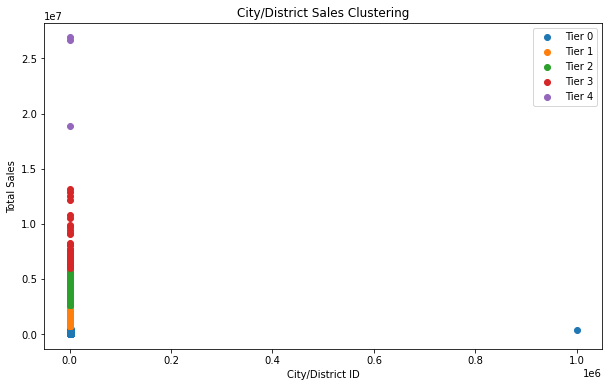

City/Districts clustered into tiers based on sales:
      CITY_DISTRICT_ID     RPTG_AMT  Tier
2009              2010      1680.53     0
2299              2300      1680.53     0
2519              2520      1680.53     0
2520              2521      1680.53     0
2562              2563      1680.53     0
...                ...          ...   ...
251                252  12838861.15     3
176                177  13199379.87     3
213                214  18900163.42     4
14                  15  26685902.30     4
75                  76  26904160.57     4

[2583 rows x 3 columns]


In [56]:
# Group by city/district and calculate the total sales (e.g. lowest spending to highest spending)
total_sales_per_district = df.groupby('CITY_DISTRICT_ID')['RPTG_AMT'].sum().reset_index()

# Number of clusters
n_clusters = 5  # Update with the desired number of tiers

# K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
total_sales_per_district['Tier'] = kmeans.fit_predict(total_sales_per_district[['RPTG_AMT']])


# Calculate the centroid values and sort them
centroids = kmeans.cluster_centers_.flatten()
sorted_centroid_indices = np.argsort(centroids)

# Create a mapping from the original cluster labels to the sorted cluster labels
label_mapping = {original_label: sorted_label for sorted_label, original_label in enumerate(sorted_centroid_indices)}

# Apply the new labels
total_sales_per_district['Tier'] = total_sales_per_district['Tier'].map(label_mapping)

# Sort by tier and sales for better visualization
total_sales_per_district = total_sales_per_district.sort_values(by=['Tier', 'RPTG_AMT'])

# Plot the clusters
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_data = total_sales_per_district[total_sales_per_district['Tier'] == i]
    plt.scatter(cluster_data['CITY_DISTRICT_ID'], cluster_data['RPTG_AMT'], label=f'Tier {i}')

plt.xlabel('City/District ID')
plt.ylabel('Total Sales')
plt.title('City/District Sales Clustering')
plt.legend()
plt.show()

# Print the result
print("City/Districts clustered into tiers based on sales:")
print(total_sales_per_district)

In [57]:
# Calculate total amount and average amount per city to display top 10 performing cities

# Calculate total amount per city
city_performance = df.groupby('SHIP_TO_CITY_CD_EN')['RPTG_AMT'].sum().reset_index()
city_performance.columns = ['City', 'Total_Amount']

# Calculate average amount per city
city_performance['Average_Amount'] = df.groupby('SHIP_TO_CITY_CD_EN')['RPTG_AMT'].mean().values

# Determine which cities are performing better
city_performance_sorted = city_performance.sort_values(by='Total_Amount', ascending=False).reset_index(drop=True)

# Get top 10 performing cities
top_10_cities = city_performance_sorted.head(10)

# Output the result
print(top_10_cities)


        City  Total_Amount  Average_Amount
0   Shanghai  1.059861e+08     8602.769750
1    Beijing  8.709278e+07     8477.833499
2   Hangzhou  5.726757e+07     8767.233371
3   Shenzhen  5.135241e+07     8531.717333
4     Suzhou  4.345930e+07     8834.986432
5    Chengdu  4.105497e+07     8126.479004
6    Nanjing  4.091455e+07     8600.913862
7      Wuhan  3.930257e+07     8778.774764
8  Guangzhou  3.563430e+07     8877.503122
9    Tianjin  3.003940e+07     8689.441932


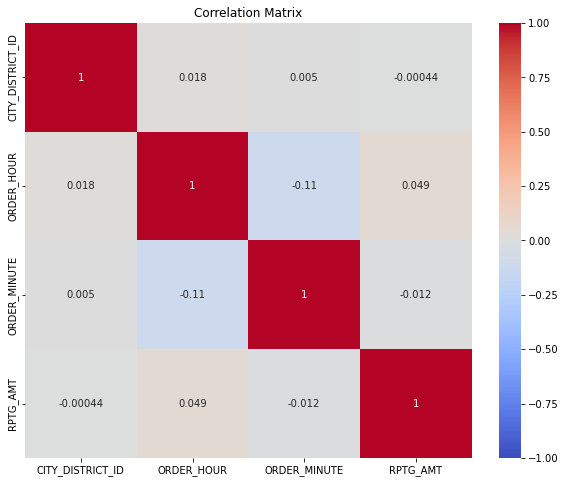

In [58]:
#Identify correlation to location or timing with heatmap

# Convert ORDER_TIME_CST to datetime to extract time components, handle errors
df['ORDER_TIME'] = pd.to_datetime(df['ORDER_TIME'], errors='coerce')

# Extract hour and minute from ORDER_TIME_CST
df['ORDER_HOUR'] = df['ORDER_TIME'].dt.hour
df['ORDER_MINUTE'] = df['ORDER_TIME'].dt.minute

# Calculate correlation matrix
correlation_matrix = df[['CITY_DISTRICT_ID', 'ORDER_HOUR', 'ORDER_MINUTE', 'RPTG_AMT']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#1 indicates a perfect positive correlation.

#Key Variables:
#CITY_DISTRICT_ID vs. RPTG_AMT
#ORDER_HOUR vs. RPTG_AMT
#ORDER_MINUTE vs. RPTG_AMT

#High Positive Correlation: If the correlation coefficient between CITY_DISTRICT_ID and RPTG_AMT is close to 1,
#it indicates that certain districts are associated with higher reporting amounts.

# plan on areas of investment in terms of marketing campaigns, opening of stores according to Total Sales Amount in these Cities by order: 

    City:         
        Shanghai  
        Beijing  
        Hangzhou 
        Shenzhen 
        Suzhou   
        Chengdu   
        Nanjing  
        Wuhan     
        Guangzhou 
        Tianjin     

In [59]:
# Group by city and district, then sum RPTG_AMT
city_group = df.groupby("SHIP_TO_CITY_CD_EN").sum()["RPTG_AMT"]
district_group = df.groupby("SHIP_TO_DISTRICT_NAME_EN").sum()["RPTG_AMT"]

In [60]:
# Sort values to get top 5 and bottom 5
top_5_cities = city_group.sort_values(ascending=False).head(5)
bottom_5_cities = city_group.sort_values(ascending=False).tail(5)

In [61]:
top_5_districts = district_group.sort_values(ascending=False).head(5)
bottom_5_districts = district_group.sort_values(ascending=False).tail(5)

In [62]:
top_5_cities, bottom_5_cities, top_5_districts, bottom_5_districts

(SHIP_TO_CITY_CD_EN
 Shanghai    1.059861e+08
 Beijing     8.709278e+07
 Hangzhou    5.726757e+07
 Shenzhen    5.135241e+07
 Suzhou      4.345930e+07
 Name: RPTG_AMT, dtype: float64,
 SHIP_TO_CITY_CD_EN
 Shennongjia Forest Area        14157.52
 Wuzhi Mountain                  8760.18
 Baisha Li Autonomous County     8760.18
 Ngari Prefecture                7862.32
 Kunyu                           7078.76
 Name: RPTG_AMT, dtype: float64,
 SHIP_TO_DISTRICT_NAME_EN
 Chaoyang District    31595955.07
 Pudong New Area      26685902.30
 Haidian District     18900163.42
 Dongguan city        13199379.87
 Minhang District     12838861.15
 Name: RPTG_AMT, dtype: float64,
 SHIP_TO_DISTRICT_NAME_EN
 Bomi County        1680.53
 Wuding County      1680.53
 Zhaojue County     1680.53
 Daning County      1680.53
 Wangcang County    1680.53
 Name: RPTG_AMT, dtype: float64)

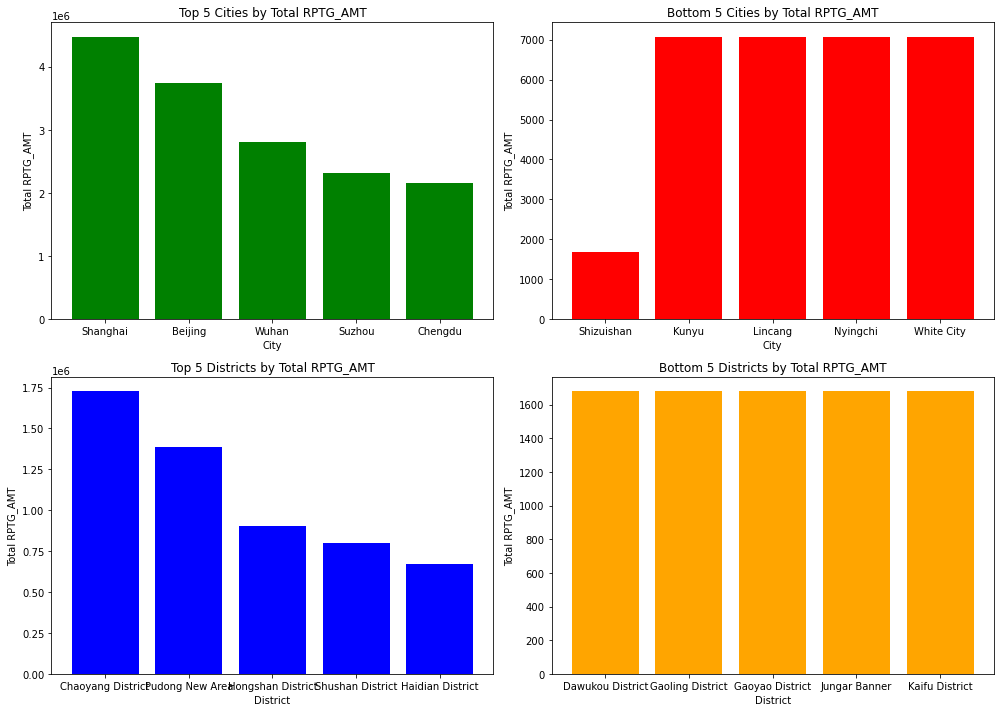

In [63]:

# Convert ORDER_TIME_CST to datetime
df['ORDER_TIME'] = pd.to_datetime(df['ORDER_TIME'])

# Filter orders between 5:00:00 AM and 9:00:00 AM
df_filtered = df[(df['ORDER_TIME'].dt.time >= pd.to_datetime('05:00:00 AM').time()) & 
                 (df['ORDER_TIME'].dt.time <= pd.to_datetime('09:00:00 AM').time())]

# Group by city and district, then sum the RPTG_AMT
city_totals = df_filtered.groupby('SHIP_TO_CITY_CD_EN')['RPTG_AMT'].sum().reset_index()
district_totals = df_filtered.groupby('SHIP_TO_DISTRICT_NAME_EN')['RPTG_AMT'].sum().reset_index()

# Sort and get the top 5 and bottom 5 cities
top5_cities = city_totals.nlargest(5, 'RPTG_AMT')
bottom5_cities = city_totals.nsmallest(5, 'RPTG_AMT')

# Sort and get the top 5 and bottom 5 districts
top5_districts = district_totals.nlargest(5, 'RPTG_AMT')
bottom5_districts = district_totals.nsmallest(5, 'RPTG_AMT')

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top 5 Cities
axes[0, 0].bar(top5_cities['SHIP_TO_CITY_CD_EN'], top5_cities['RPTG_AMT'], color='green')
axes[0, 0].set_title('Top 5 Cities by Total RPTG_AMT')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Total RPTG_AMT')

# Bottom 5 Cities
axes[0, 1].bar(bottom5_cities['SHIP_TO_CITY_CD_EN'], bottom5_cities['RPTG_AMT'], color='red')
axes[0, 1].set_title('Bottom 5 Cities by Total RPTG_AMT')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Total RPTG_AMT')

# Top 5 Districts
axes[1, 0].bar(top5_districts['SHIP_TO_DISTRICT_NAME_EN'], top5_districts['RPTG_AMT'], color='blue')
axes[1, 0].set_title('Top 5 Districts by Total RPTG_AMT')
axes[1, 0].set_xlabel('District')
axes[1, 0].set_ylabel('Total RPTG_AMT')

# Bottom 5 Districts
axes[1, 1].bar(bottom5_districts['SHIP_TO_DISTRICT_NAME_EN'], bottom5_districts['RPTG_AMT'], color='orange')
axes[1, 1].set_title('Bottom 5 Districts by Total RPTG_AMT')
axes[1, 1].set_xlabel('District')
axes[1, 1].set_ylabel('Total RPTG_AMT')

plt.tight_layout()
plt.show()


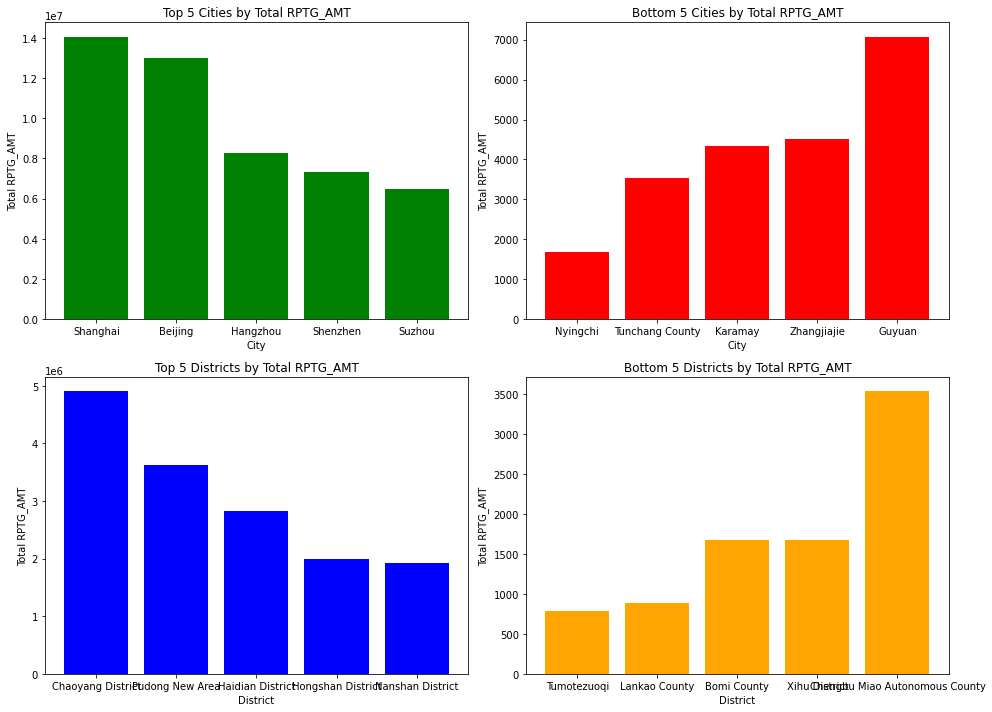

In [64]:
# Convert ORDER_TIME_CST to datetime
df['ORDER_TIME'] = pd.to_datetime(df['ORDER_TIME'])

# Filter orders between 5:00:00 AM and 9:00:00 AM
df_filtered = df[(df['ORDER_TIME'].dt.time >= pd.to_datetime('12:00:00 PM').time()) & 
                 (df['ORDER_TIME'].dt.time <= pd.to_datetime('03:00:00 PM').time())]

# Group by city and district, then sum the RPTG_AMT
city_totals = df_filtered.groupby('SHIP_TO_CITY_CD_EN')['RPTG_AMT'].sum().reset_index()
district_totals = df_filtered.groupby('SHIP_TO_DISTRICT_NAME_EN')['RPTG_AMT'].sum().reset_index()

# Sort and get the top 5 and bottom 5 cities
top5_cities = city_totals.nlargest(5, 'RPTG_AMT')
bottom5_cities = city_totals.nsmallest(5, 'RPTG_AMT')

# Sort and get the top 5 and bottom 5 districts
top5_districts = district_totals.nlargest(5, 'RPTG_AMT')
bottom5_districts = district_totals.nsmallest(5, 'RPTG_AMT')

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top 5 Cities
axes[0, 0].bar(top5_cities['SHIP_TO_CITY_CD_EN'], top5_cities['RPTG_AMT'], color='green')
axes[0, 0].set_title('Top 5 Cities by Total RPTG_AMT')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Total RPTG_AMT')

# Bottom 5 Cities
axes[0, 1].bar(bottom5_cities['SHIP_TO_CITY_CD_EN'], bottom5_cities['RPTG_AMT'], color='red')
axes[0, 1].set_title('Bottom 5 Cities by Total RPTG_AMT')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Total RPTG_AMT')

# Top 5 Districts
axes[1, 0].bar(top5_districts['SHIP_TO_DISTRICT_NAME_EN'], top5_districts['RPTG_AMT'], color='blue')
axes[1, 0].set_title('Top 5 Districts by Total RPTG_AMT')
axes[1, 0].set_xlabel('District')
axes[1, 0].set_ylabel('Total RPTG_AMT')

# Bottom 5 Districts
axes[1, 1].bar(bottom5_districts['SHIP_TO_DISTRICT_NAME_EN'], bottom5_districts['RPTG_AMT'], color='orange')
axes[1, 1].set_title('Bottom 5 Districts by Total RPTG_AMT')
axes[1, 1].set_xlabel('District')
axes[1, 1].set_ylabel('Total RPTG_AMT')

plt.tight_layout()
plt.show()

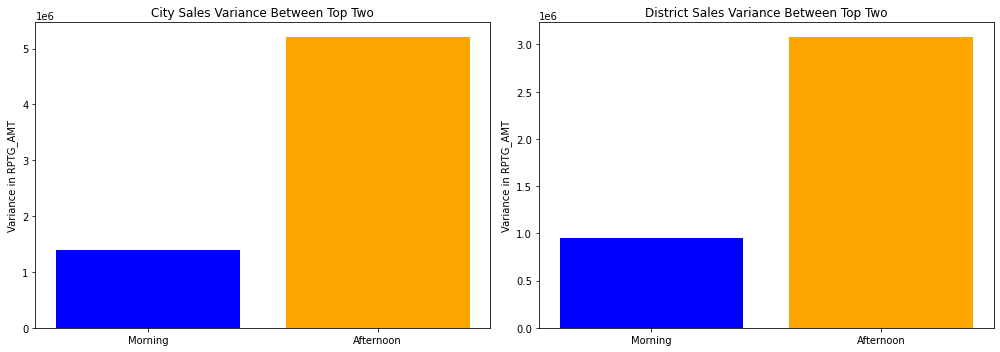

In [65]:
# Convert ORDER_TIME_CST to datetime
df['ORDER_TIME'] = pd.to_datetime(df['ORDER_TIME'])

# Define morning and afternoon session time ranges
morning_start = pd.to_datetime('05:00:00').time()
morning_end = pd.to_datetime('12:00:00').time()
afternoon_start = pd.to_datetime('12:00:01').time()
afternoon_end = pd.to_datetime('19:00:00').time()

# Filter orders for morning and afternoon sessions
morning_df = df[(df['ORDER_TIME'].dt.time >= morning_start) & 
                (df['ORDER_TIME'].dt.time <= morning_end)]

afternoon_df = df[(df['ORDER_TIME'].dt.time >= afternoon_start) & 
                  (df['ORDER_TIME'].dt.time <= afternoon_end)]

# Function to calculate the variance between top two sales
def calculate_top_two_variance(grouped_df):
    top_two = grouped_df.nlargest(2, 'RPTG_AMT')
    if len(top_two) < 2:
        return 0
    return top_two.iloc[0]['RPTG_AMT'] - top_two.iloc[1]['RPTG_AMT']

# Group by city and district and calculate the variance for morning and afternoon sessions
city_variance_morning = morning_df.groupby('SHIP_TO_CITY_CD_EN')['RPTG_AMT'].sum().reset_index()
city_variance_afternoon = afternoon_df.groupby('SHIP_TO_CITY_CD_EN')['RPTG_AMT'].sum().reset_index()
district_variance_morning = morning_df.groupby('SHIP_TO_DISTRICT_NAME_EN')['RPTG_AMT'].sum().reset_index()
district_variance_afternoon = afternoon_df.groupby('SHIP_TO_DISTRICT_NAME_EN')['RPTG_AMT'].sum().reset_index()

city_top_two_variance_morning = calculate_top_two_variance(city_variance_morning)
city_top_two_variance_afternoon = calculate_top_two_variance(city_variance_afternoon)
district_top_two_variance_morning = calculate_top_two_variance(district_variance_morning)
district_top_two_variance_afternoon = calculate_top_two_variance(district_variance_afternoon)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# City Variance
axes[0].bar(['Morning', 'Afternoon'], [city_top_two_variance_morning, city_top_two_variance_afternoon], color=['blue', 'orange'])
axes[0].set_title('City Sales Variance Between Top Two')
axes[0].set_ylabel('Variance in RPTG_AMT')

# District Variance
axes[1].bar(['Morning', 'Afternoon'], [district_top_two_variance_morning, district_top_two_variance_afternoon], color=['blue', 'orange'])
axes[1].set_title('District Sales Variance Between Top Two')
axes[1].set_ylabel('Variance in RPTG_AMT')

plt.tight_layout()
plt.show()


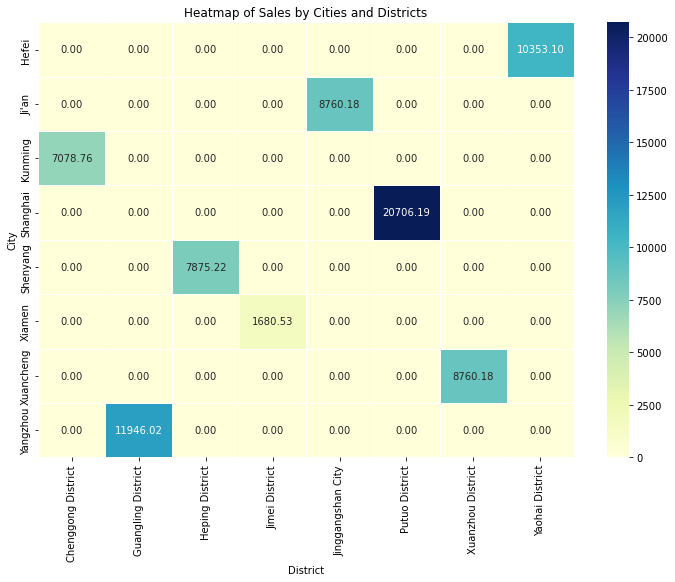

In [72]:
# Aggregate total RPTG_AMT by city and district
agg_df = df.groupby(['SHIP_TO_CITY_CD_EN', 'SHIP_TO_DISTRICT_NAME_EN'])['RPTG_AMT'].sum().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(agg_df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Sales by Cities and Districts')
plt.xlabel('District')
plt.ylabel('City')
plt.show()
